# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import pprint

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

print("Median Values")
data.median()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Median Values


Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [2, 10, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print("Normalized by Median Value")
samples/data.median()

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,3366,5403,12974,4400,5977,1744
2,4446,906,1238,3576,153,1014


Normalized by Median Value


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.747060,2.428453,1.615813,1.576016,4.306185,8.124288
1,0.395814,1.489661,2.728209,2.883355,7.320269,1.806318
2,0.522813,0.249793,0.260330,2.343381,0.187385,1.050233


In [5]:
print("Normalized by Mean Value")
samples/data.mean()

Normalized by Mean Value


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.529404,1.519599,0.966386,0.782895,1.220201,5.144044
1,0.280493,0.932152,1.631688,1.432323,2.074272,1.143704
2,0.370491,0.156308,0.155698,1.164088,0.053097,0.664975


#### HeatMap of Percentile Ranks

A heatmap of percentil ranks is useful for visualizing the patterns of each selected sample relative to the entire data set.

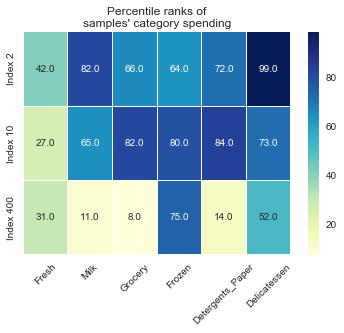

In [38]:
# calculate percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).loc[indices].round(decimals=2)

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Since the data is highly skewed accross all categories my main focus for comparison to a measure of central tendency, is the median value for each category.

- **Sample Customer 1:**  This customer tends to spend on Deli and Detergents and Paper, but also is considerably higher than the median for Grocery and Milk as well. This relative trend is also observed when comparing means values. This cusomter appears to be distinct from customers 2 and 3. This is likely a cafe or a business that contains a cafe. For example, where I live there are a lot of convennience stores that have delis, sandwhich shops, or other to-go style food service. These businesses tend to stock cleaniing products, deli meats, milk, frozen foods, and some common "fresh" items.

- **Sample Customer 2:**  This customer tends to spend the most on Detergents_Paper, Grocery, and Frozen items and also exceeds the mean and median for these items. Customer 2 appears to be distinct from customer 1 and 3. Based on the mix of each spending in each category this customer may be a convenience store.

- **Sample Customer 3:**  This customer tends to spend similarly on Fresh and Frozen, and lower, but similar amounts on Grocery and Deli, with extremely low spending on Detergents_Paper. Spending is well below the mean and median for all but frozen which is slighly above the mean, and over 2 fold above the median.  This customer appears distinct from customer 2 and 3. This is the most difficult customer to interpret because the raw number is each category do not suggest a sizeable business. This could be a business that is that is stocking convenience foods for customers and employees. For example this could be a business with a lunch room that keeps snacks for employees or a gym which stocks product for customer purchase.  The one thing not consistent with this is the low level of spending on Detergents_Paper. This is difficult to reconcile for any business. 

Note that samples 2 and 10 (customer samples 1 and 2) share more in common in terms of rank pattern than sample 400 (customer sample 3).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
target= new_data.pop('Grocery')

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state= 42)
regressor.fit(X_train, y_train)

pred= regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

0.68188400854408338

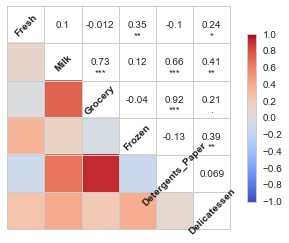

In [39]:
# visualize correlations and calculate p-values
sns.corrplot(data)

The plot above shows that grocery has a strong positive correlation with Detergents_Paper and Milk.

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict grocery which resulted in an R^2 of 0.68. This stands to reason since nearly any  business purchasing things like Deli, Milk, or Fresh is likely to need Grocery items as well. Given this, it is clear that this feature does not offer a substantial amount of information that is not already captured by the combination of the remaining features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

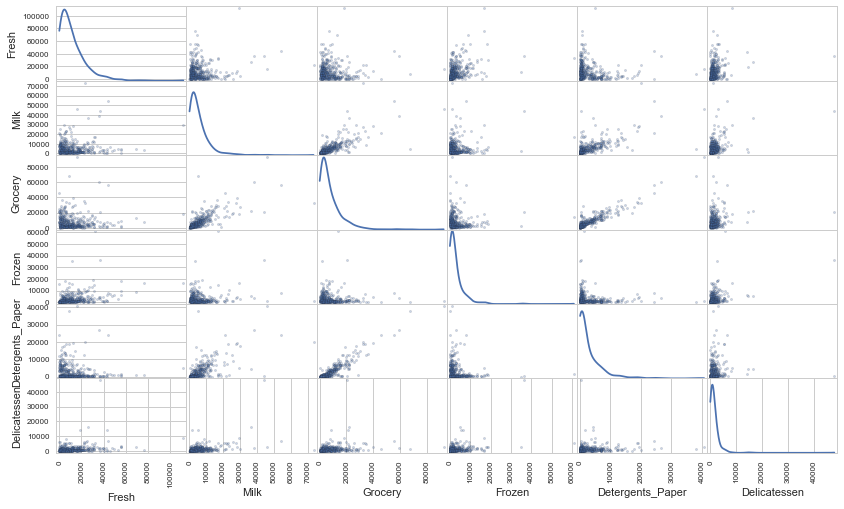

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Determine level of skew in data


The results above should be investigated by mesuring the level of skew. For normally distriibuted data, skew should be approximately 0, with level of skew indicated by distance from 0 and the direction of skew indicated by sign (+ is left skew, negative is right skew).  The results below indicate left skew for all features, which is consitent with the KDE plots in the scatter matrix above.

In [46]:
from scipy import stats

skews = dict()
for col in data.columns:
    # For normally distributed data, the skewness should be about 0. 
    # skewness value > 0 means more weight in left tail of the distribution.
    
    skews[col] = stats.skew(data[col])

skews

{'Delicatessen': 11.113533648709097,
 'Detergents_Paper': 3.6194575783115934,
 'Fresh': 2.5525826879071585,
 'Frozen': 5.887825728957787,
 'Grocery': 3.5751872200807875,
 'Milk': 4.039922122788577}

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

- **Distribution:** Thhe distribution is positively skewed with most of the data at the lower end then tailing higher spending. This the type of distribution that would be expected from a mix of small and large businesses that is precominately composed of small busineses.


- **Feature Pairs which exhibit correlation:** Milk, Detergents_Paper, and Grocery appear to be correlated with eachother.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

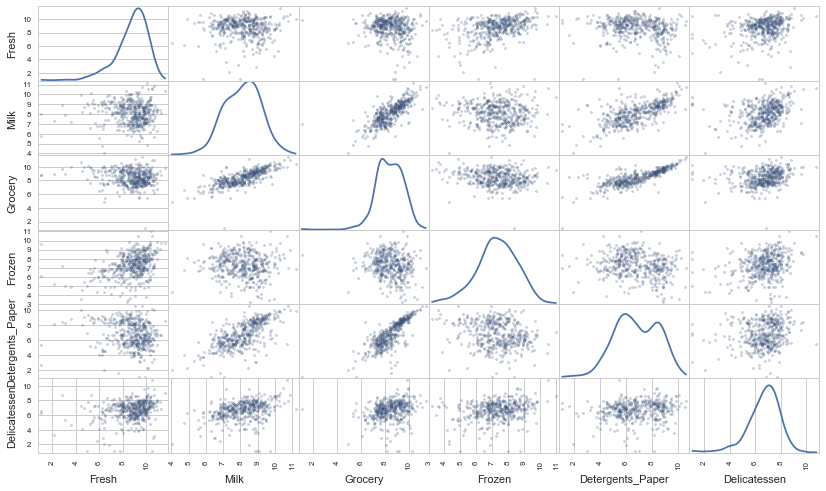

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
log_samples.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


In [12]:
log_samples.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,8.425974,8.162388,8.512950,8.118888,7.297064,7.784366
std,0.318411,1.197236,1.233374,0.306933,1.980802,1.059895
min,8.121480,6.809039,7.121252,7.785305,5.030438,6.921658
25%,8.260620,7.701874,8.034074,7.983653,6.597759,7.192797
50%,8.399760,8.594710,8.946896,8.182000,8.165079,7.463937
75%,8.578221,8.839063,9.208799,8.285680,8.430377,8.215720
max,8.756682,9.083416,9.470703,8.389360,8.695674,8.967504


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
#outlier_indices= []
outlier_indices= {}
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    iqr= Q3 - Q1
    step = 1.5 * iqr
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_series= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_series.head())

    
    # count each outliers index
    for i in outliers_series.index:
        if i in outlier_indices:
            outlier_indices[i] += 1
        else:
            outlier_indices[i]= 1

# filter for outliers in multiple categories
multiple_outliers= {x for x in outlier_indices if outlier_indices[x] > 1}
  
# OPTIONAL: Select the indices for data points you wish to remove
# filter for outliers not in the chosen samples
outliers= [x for x in multiple_outliers if x not in indices]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

outliers



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612


[128, 65, 154, 75, 66]

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  

Data points 65, 66, 75, 128, 154 are outliers for 2 -3 categories. These points may skew the data in ways that impact clustering and were therefore removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

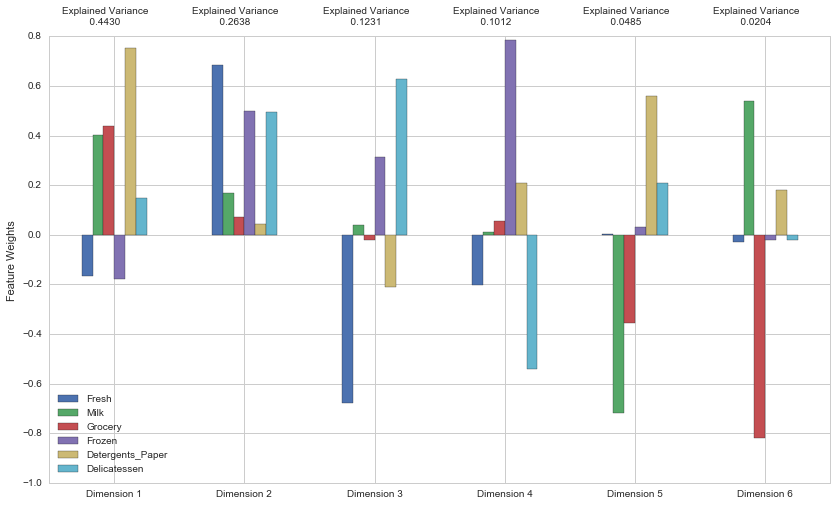

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
components = 6
pca = PCA(n_components= components).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [15]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.0026,-0.7192,-0.3554,0.0331,0.5582,0.2092
Dimension 6,0.0204,-0.0292,0.5402,-0.8205,-0.0205,0.1824,-0.0197


In [16]:
pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- Variance Explained:
    + First and Second PC: 71%
    + First for PCs: 93%
    i
- Dimension one represents Milk, Grocery, and Detergents_Paper
- Dimension 2 represents Fresh, Frozen, Deli
- Dimension 3 represents a negative correlation to fresh spending and a postive correlation to Deli
- Dimension 4 is dominated by frozen with some negative correlation to Deli, somewhat inverse of dimension 3 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values).describe())

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
count,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000
mean,0.489867,0.733033,1.061067,0.21010,0.488233,0.038067
std,2.593498,0.850314,0.237650,0.77792,0.085301,0.280859
min,-2.502500,-0.100600,0.853700,-0.54320,0.393400,-0.249500
25%,-0.309550,0.300000,0.931400,-0.19010,0.453000,-0.098750
50%,1.883400,0.700600,1.009100,0.16300,0.512600,0.052000
75%,1.986050,1.149850,1.164750,0.58675,0.535650,0.181850
max,2.088700,1.599100,1.320400,1.01050,0.558700,0.311700


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
components= 2
pca = PCA(n_components= 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']).describe())

,Dimension 1,Dimension 2
count,3.000000,3.000000
mean,0.489867,0.733033
std,2.593498,0.850314
min,-2.502500,-0.100600
25%,-0.309550,0.300000
50%,1.883400,0.700600
75%,1.986050,1.149850
max,2.088700,1.599100


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

To contrast the K-means and Gaussian Mixture Model (GMM) algorithms we must first understand how they work.  

#### GMM

GMM is a soft clustering algorithm, which operates in two phases.

**Phase 1**:
1. Randomly assign k (user specifified) cluster centers
2. Iterate through each of the k cluster centers and calculate probabilty of a given point belonging to that cluster as a function of the distance from the cluster center. Note that to accomplish this a probablilty distribution (assumed to be Gaussian) must be calculated as a function of the distance of all points form that cluster center.

**Phase 2:**  Calculate a new mean for each cluster center as a function of the data points that belong to that cluster

This continues until the cluster centers stop moving to an appreciable degree or it reaches a pre-defined number of iterations.

#### K-Means

K-Means is a hard clustering algorithm which also operates in two phases. The operations are similar to GMM but instead of assigning probabilities to data points it assigns a treshold value of either 0 or 1. In contrast to GMM where data points are shared by clusters, the determinati0n is binary, a given point is assigned to a cluster or it isn't.

#### Advantages

- **Ability to Scale:** The advantage to GMM is that we can achieve higher resolution. That is, we can separate clusters since we have a continuous output as a function of distance from cluster centers. The disadvantage is that this is more computationally intenseive than K-means because for phase 2 GMM calculates a probability distribution for each iteration, whereas K-means calculates the mean.  Due to sharing, the number of points involved in the GMM calculation is also greater than that of K-means. Consequently K-means is much faster and more scaleable.

- **Complexity:** K-means is simpler to use "out of the box" as it has considerably fewer parameters than GMM, making it a good general puprose algorithm. GMM however is more robust to differences in cluster shape whereas K-means takes a "one size fits all" approach to cluster shape assumming spherical clusters.

#### Chosen Algorithm

Since I'm still gaining familiarity with the data and since future data sets could be very large, I decided to go with K-means due to its speed, ability to scale, and low complexity.


**Answer:**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters= range(2,7)
scores= dict()

for cluster in clusters:

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters= cluster, random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, random_state=42)
    scores[cluster]= score

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I tried 2 - 6 clusters, resulting in the following scores:

In [21]:
pd.DataFrame(scores, index= ['score'])

,2,3,4,5,6
score,0.426281,0.396891,0.331841,0.349998,0.365885


In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters= 2, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

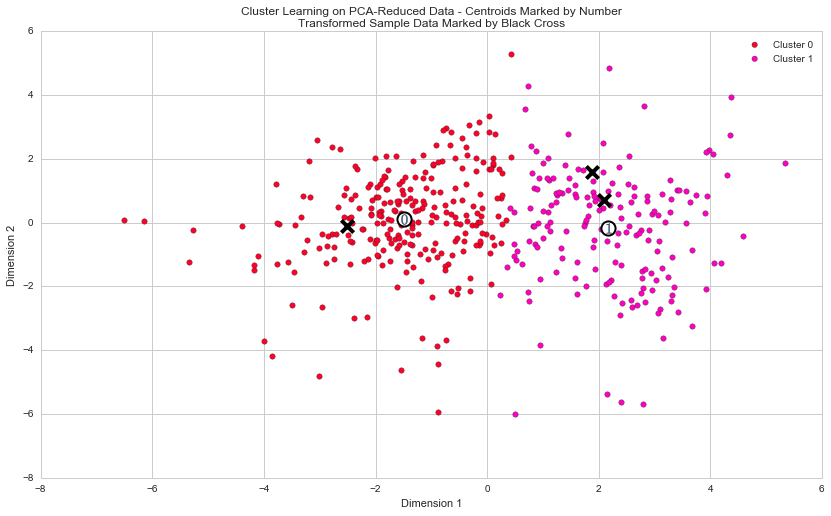

In [23]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [25]:
good_mean= np.exp(good_data.mean())
good_median = np.exp(good_data.median())

In [26]:
print('Normalized to Median')

display(true_centers/good_median)

print('Normalized to Mean')

display(true_centers/good_mean)

Normalized to Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,1.035260,0.522014,0.520706,1.354964,0.361624,0.704240
Segment 1,0.467601,2.173913,2.544461,0.617781,5.610086,1.071355


Normalized to Mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,1.381847,0.559704,0.524436,1.376248,0.327775,0.843002
Segment 1,0.624145,2.330872,2.562684,0.627485,5.084970,1.282452


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

##### **Answer:**

**Segment 0:** Customers in this segment:
- Spend in the following manner: Fresh >> Frozen ~ Grocery ~ Milk > Deli > Detergents_Paper
- Spend between 1 and 1.4x the mean or median for Fresh and Frozen and below the mean and median in all other categories
- This customer may be a cafe or restaurant

**Segment 1** Customers in this segment:
- Spend in the following manner: Grocery >> Milk >> Fresh ~ Detergents_Paper >> Deli >> Frozen
- Spend 5 -6 times the mean and median on Detergents_Paper, 2 - 2.5 times the mean and median on Milk and  grocery, 1 - 1.3 times the mean and median on Deli and below the median on Fresh and Frozen.
- This customer may be a market.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [28]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,3366,5403,12974,4400,5977,1744
2,4446,906,1238,3576,153,1014


**Answer:**

See the plots and text below for a detailed description for how the following conclusions were drawn.

- **Sample 2 and Sample 10:**  Comparing values for each feature in this sample to the mean values for each segment demonstrates that samples 2 and 10 are reasonably consistent with segment 1. Some features however are not even close to the mean value. These samples definately have more in common with segment 0. The result make me wonder if there is actually a 3rd cluster where edge cases may fit.

- **Sample 400:** By comparing values for each feature in this sample to the mean values for each segment, it is clear this sample is consitent with an assignment to segement 0.

To determine how consitent the selected samples are with characteristics of their assigned cluster I will plot the ratio of each feature value in the samples with the corresponding cluster mean. I had originally done this with the median value as well but then realized the mean and median are very close for each segment, suggesting that the per segment data is normally distributed.  The intent is to visualize which features for the samples are similar in value to the central tendency of their assigned cluster/segment. A value of 1 would indicate an identical match.

In [29]:
seg_mean= true_centers/good_mean
samp_mean= samples/good_mean

#### Samples Compared to Segment 0

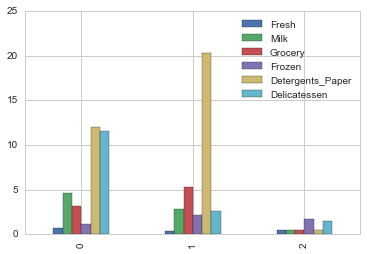

In [30]:
(samp_mean/seg_mean.values[0]).plot(kind= 'bar')

#### Samples compared to cluster 0

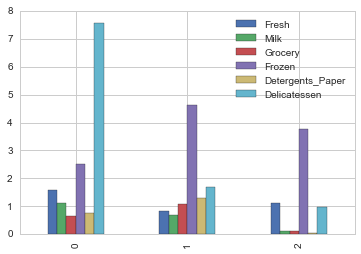

In [31]:
(samp_mean/seg_mean.values[1]).plot(kind= 'bar')

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**  While our Null Hypothesis for the AB test would likely be that the change affects all cutomers equally, this is unlikely. My intuition tells me that Segment 0, which is heavily reliant on Fresh, may not react positively to the new delivery schedule.  There are two main approaches to determine which group of customers would be most affected.

- **Approach 1:** Conduct the A (regular delivery schedule)/B (new delivery schedule) experiment on a randomly selected sample of ALL customers where the distribution of segments is approximatley equal in each group. We would measure customer reaction (maybe a survey) in both A and B groups as a whole and for each customer.  We would then group by segement and gauge the response per segment.  The disadvantage of this approach would be collecting enough data to have sufficient power to resolve an effect for each segment.


- **Approach 2:** Conduct the A/B test on seperately on customers that correspond to each segment. This focus would allow sufficinet data to be collected on a segment of interest to resolve true effects.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** 

The new customers could be labled as follows:

- Assign labels (customer segment) to each customer using the clustering algorithm developed during the project
- Train and validate a classifier which uses the purchasing data features to assign customer segment (customer segment is the target variable)
- Apply the validated classifier to the new data (new customers) to predict their customer segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

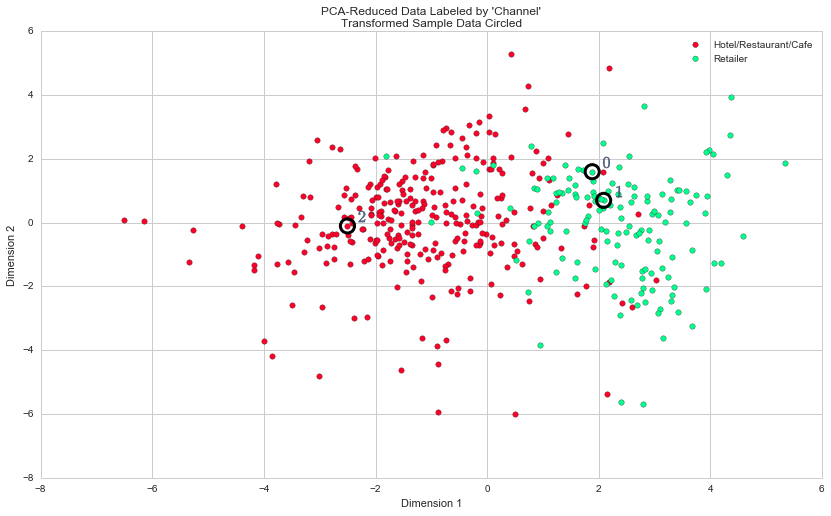

In [32]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorihm and number of clusters chosen compares reasonablu well to the underlying distribution. There are two large clusters and one small cluster in the underlying distribution. I chose a model with 2 clusters which is able to explain the two main categories in Channel. I had considred adding a 3rd cluster but decided not to since the cluster centers are so close and the silohuettte score was lower for 3 customers. I was concerned that I may be clustering two groups that are very similar and that truly resolving them to a degree which informs business decision would not be feasible with the amount of data provided.  I did consider using GMM to get some resolution boost but ultimately decided to keep the clustering algorithm simple and scaleable. 

The provided classifications are consistent with my previous defintion of customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.